Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


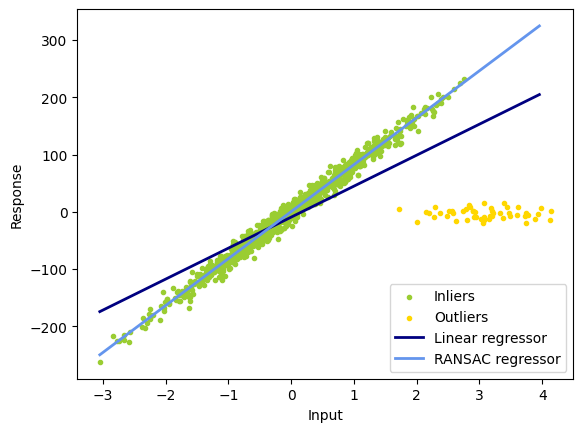

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [2]:
X

array([[ 3.88202617e+00],
       [ 3.20007860e+00],
       [ 3.48936899e+00],
       [ 4.12044660e+00],
       [ 3.93377900e+00],
       [ 2.51136106e+00],
       [ 3.47504421e+00],
       [ 2.92432140e+00],
       [ 2.94839057e+00],
       [ 3.20529925e+00],
       [ 3.07202179e+00],
       [ 3.72713675e+00],
       [ 3.38051886e+00],
       [ 3.06083751e+00],
       [ 3.22193162e+00],
       [ 3.16683716e+00],
       [ 3.74703954e+00],
       [ 2.89742087e+00],
       [ 3.15653385e+00],
       [ 2.57295213e+00],
       [ 1.72350509e+00],
       [ 3.32680930e+00],
       [ 3.43221810e+00],
       [ 2.62891749e+00],
       [ 4.13487731e+00],
       [ 2.27281716e+00],
       [ 3.02287926e+00],
       [ 2.90640807e+00],
       [ 3.76638961e+00],
       [ 3.73467938e+00],
       [ 3.07747371e+00],
       [ 3.18908126e+00],
       [ 2.55610713e+00],
       [ 2.00960177e+00],
       [ 2.82604393e+00],
       [ 3.07817448e+00],
       [ 3.61514534e+00],
       [ 3.60118992e+00],
       [ 2.8

In [4]:
y

array([-1.19546656e+01,  8.69024979e-01, -8.10805138e+00, -1.48063218e+01,
       -3.28182228e+00,  1.28331871e+00, -2.33482778e+00,  2.47189774e-02,
       -9.34322094e+00, -6.62741166e+00, -9.72460448e+00, -6.59553162e+00,
       -1.11314628e+01, -2.02628260e+01, -1.22573858e+00, -7.01780936e+00,
       -1.93019835e+01,  1.62782256e+00, -1.20729836e+01, -2.48054604e+00,
        4.29090562e+00, -1.71017089e+00,  8.39400685e+00, -1.53482582e+01,
        1.02341641e+00, -9.84810091e+00, -1.17079715e+01, -8.78849665e+00,
       -6.11552532e+00, -2.43834658e+00, -1.46514984e+01,  6.00826487e+00,
        1.65662440e+00, -1.83624369e+01,  1.18825219e+01,  1.59588918e+01,
        8.78779571e+00, -4.79924836e+00, -1.37075262e+01,  7.54451727e+00,
       -7.03176947e+00,  9.22445070e+00, -9.17250219e-01,  6.76639036e+00,
        5.63663972e-01,  4.06573168e+00, -2.89499979e+00,  1.48587049e+01,
       -1.73087907e+00,  1.01989363e+00,  1.12667023e+02,  1.61840007e+02,
       -9.20332152e+01, -